In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
from torchvision import transforms, datasets

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)



Using Pytorch version :  1.9.0  Device :  cuda


오디오들이 
1초, 2초, 3초 각각 다르다.

음성이 뭉개진 데이터도 있다.

### 오디오 전처리

https://hyunlee103.tistory.com/36

https://hyongdoc.tistory.com/404

https://ichi.pro/ko/python-eul-sayonghan-eum-ag-jangleu-bunlyu-218892206272728

torchaudio

https://ahnjg.tistory.com/93

In [8]:
!pip install librosa --user

In [12]:
!pip install numba==0.53# numpy 버전 맞추기 위해서

  Using cached numba-0.53.0-cp38-cp38-win_amd64.whl (2.3 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'D:\\miniconda3\\envs\\local_torch\\Lib\\site-packages\\~umba\\core\\runtime\\_nrt_python.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
np.__version__

'1.20.3'

In [2]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

#audio_path = './voice_data/disorder/export/blues.00000.wav'
#audio_path = './voice_data/disorder/export/101-phrase.wav'
audio_path = './voice_data/disorder/export/105-phrase.wav'
sig, sr = librosa.load(audio_path, sr=50000)# 논문에서 f_s = 50 000HZ
#모음데이터는 1초에서 3초로 sampling 했다고 한다. (2초)

print(sig,sig.shape)
#155269 frame이란걸 알 수 있고

[0.00521851 0.00506592 0.00500488 ... 0.0017395  0.0020752  0.0022583 ] (174653,)


Text(0.5, 1.0, 'Waveform')

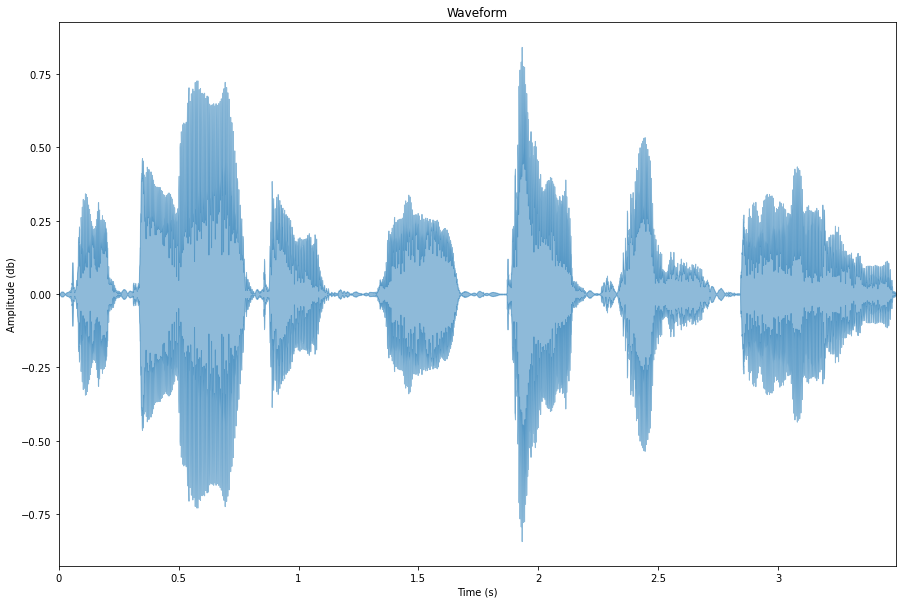

In [3]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (db)")
plt.title("Waveform")

## 단순 푸리에 변환 → Spectrum

Text(0.5, 1.0, 'Power spectrum')

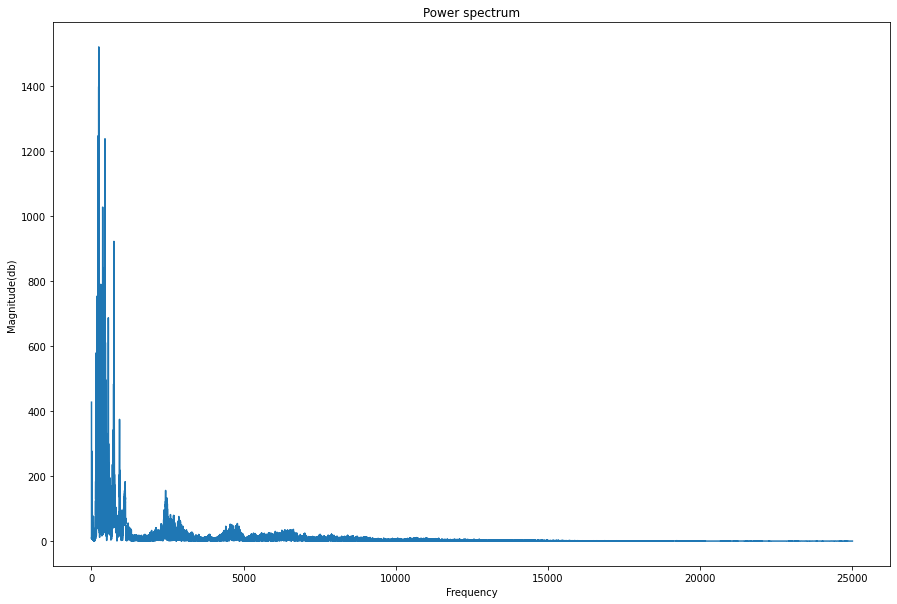

In [4]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
#left_spectrum = magnitude
#left_f=f
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude(db)")
plt.title("Power spectrum")

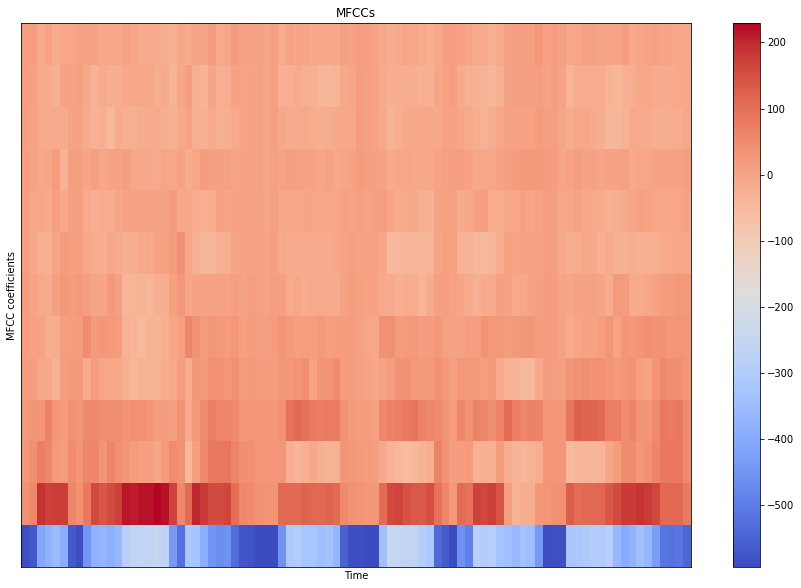

In [5]:
# MFCCs
#librosa에서는 stft로 수행해서, 시간 정보를 보존하기 위해 frame단위로 fft 수행.
# extract 13 MFCCs
n_fft= 1024# 프레임 하나당 sample 수.
hop_length= 2048# 전체 프레임 수


MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [6]:
MFCCs.shape# 76frame(time step).

(13, 86)